# APRENDIZAJE NO SUPERVISADO

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Breast cancer dataset
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Our sample fruits dataset
fruits = pd.read_table('fruit_data_with_colors.txt')
X_fruits = fruits[['mass','width','height', 'color_score']]
y_fruits = fruits[['fruit_label']] - 1

## Clustering

### K-means

In [9]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from adspy_shared_utilities import plot_labelled_scatter
from sklearn.preprocessing import MinMaxScaler

#ES UNSUPERVISED YA NO HAY TRAINIG Y TESTING
#PODEIS PROBAR PARA OTROS CLUSTERS

X, y = make_blobs(random_state = 10)

X_normalized = MinMaxScaler().fit(X).transform(X) 
#CLUSTERING TAMBIEN SE PUEDE BENEFICIAR DE NORMALIZACION


kmeans = KMeans(init='k-means++', n_clusters = 5)
kmeans.fit(X)

#PROBAR OTROS N_CLUSTER
#PROBAR OTORS n_CLUSTER

print(kmeans.cluster_centers_)
print(kmeans.inertia_)



[[ 0.6908221  -5.04589228]
 [ 2.34107224  4.44587275]
 [ 5.6183469  -9.54288499]
 [-0.72725855 -6.03241582]
 [ 3.98920748  5.80722659]]
130.46261058161915


<IPython.core.display.Javascript object>


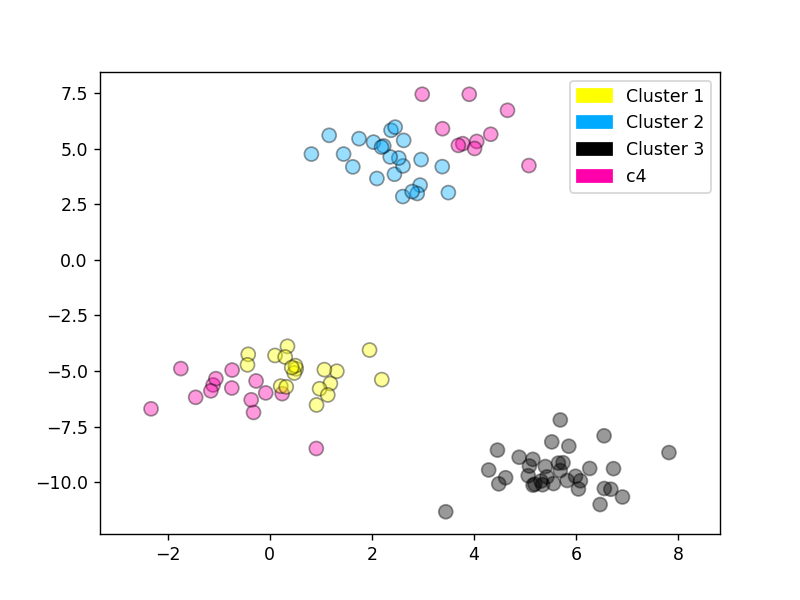

In [10]:
plot_labelled_scatter(X, kmeans.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3','c4'])



Initialization complete
Iteration 0, inertia 1.5154998314658388
Iteration 1, inertia 1.1491408486878039
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1.824312682960416
Iteration 1, inertia 1.1491408486878039
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1.4027213913530379
Iteration 1, inertia 1.1491408486878039
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1.2188199585674029
Iteration 1, inertia 1.1491408486878039
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1.5985954649188336
Iteration 1, inertia 1.1491408486878039
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1.522212455481706
Iteration 1, inertia 1.1491408486878039
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2.3617901950378424
Iteration 1, inertia 1.149140848687803

<IPython.core.display.Javascript object>


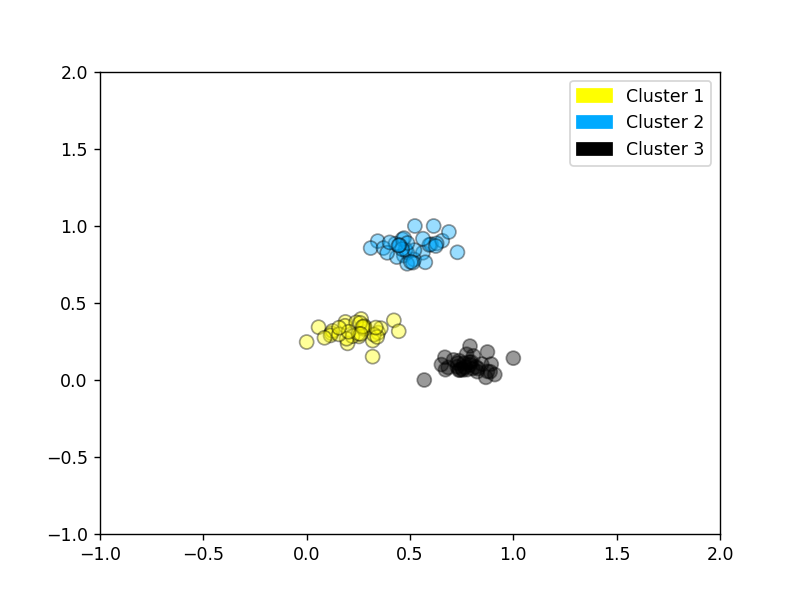

In [16]:
#EN GENERAL ES IMPORTANTE ESCALAR ANTES DE HACER K-MEANS

kmeans = KMeans(init='k-means++', n_clusters = 3, verbose=4)

kmeans.fit(X_normalized)

plot_labelled_scatter(X_normalized, kmeans.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3'])

In [13]:
kmeans.cluster_centers_

array([[0.78289451, 0.095112  ],
       [0.23794168, 0.31237463],
       [0.50910997, 0.86227808]])

In [14]:
kmeans.labels_

array([1, 1, 2, 0, 2, 2, 0, 1, 2, 0, 0, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 1,
       2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 2, 0, 1, 1, 1, 2, 2, 2, 1, 0, 1, 1,
       2, 0, 0, 0, 1, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 2, 2, 1, 1, 1, 0,
       0, 1, 1, 1, 2, 0, 2, 2, 1, 2, 2, 1, 0, 0, 0, 2, 0, 2, 1, 2, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0])

In [4]:
kmeans.n_iter_

2

In [15]:
kmeans.predict([[0, 0], [1, 1]])

array([1, 2])

In [8]:
kmeans.inertia_

1.1491408486878039

## SELECCION DEL NUMERO OPTIMO DE CLUSTERS MEDIANTE EL METODO DEL CODO ( K vs inertia_ )

<IPython.core.display.Javascript object>


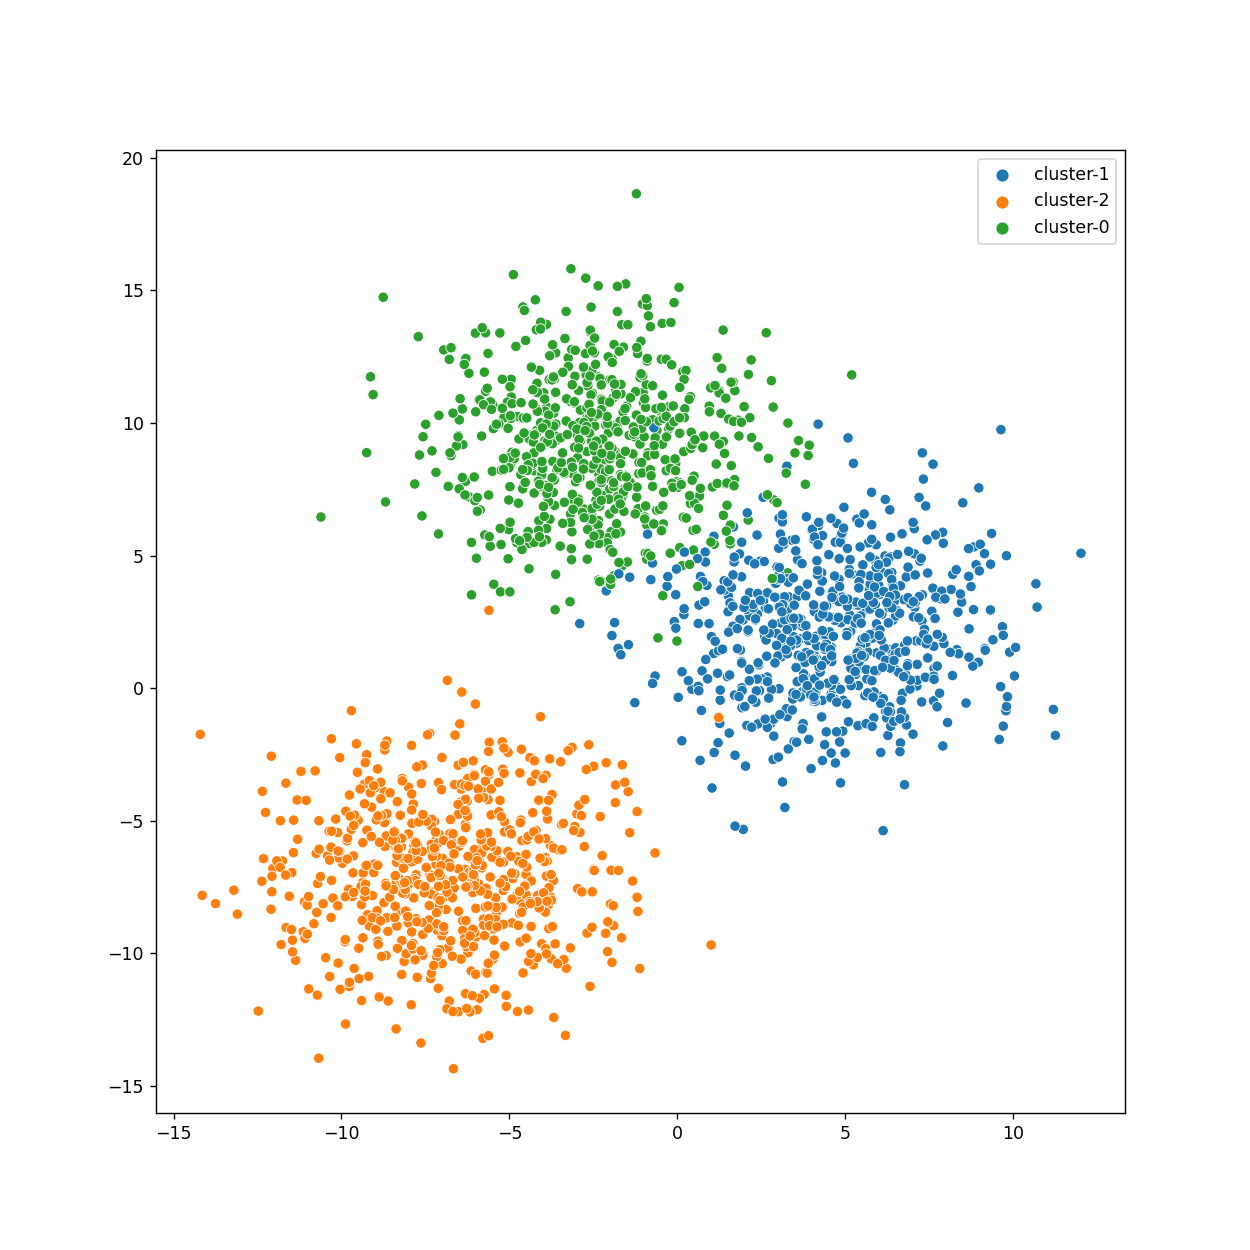

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

In [29]:
from sklearn.datasets import make_blobs
import seaborn as sns

n_samples = 2000
n_features = 2
centers = 3
cluster_std = 2.5

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers, 
                  cluster_std=cluster_std, random_state=42)

fig = plt.figure(figsize=(10, 10))
sns.scatterplot(X[:,0], X[:,1], hue=["cluster-{}".format(x) for x in y])

For n_clusters = 2 The inertia is : 976.8773336900748
For n_clusters = 3 The inertia is : 186.3658862010145
For n_clusters = 4 The inertia is : 154.51692168898714
For n_clusters = 5 The inertia is : 130.59087455101113
For n_clusters = 6 The inertia is : 115.81864813883834
For n_clusters = 7 The inertia is : 97.2532915128868
For n_clusters = 8 The inertia is : 85.09628264467727
For n_clusters = 9 The inertia is : 73.607098088233
For n_clusters = 10 The inertia is : 65.04924403455499
For n_clusters = 11 The inertia is : 59.324046376865866
For n_clusters = 12 The inertia is : 52.84112633891361
For n_clusters = 13 The inertia is : 50.25330219260444
For n_clusters = 14 The inertia is : 47.31200086544727
For n_clusters = 15 The inertia is : 40.86845990082264
For n_clusters = 16 The inertia is : 38.883436819867455
For n_clusters = 17 The inertia is : 34.84075273952736
For n_clusters = 18 The inertia is : 34.02409247332838
For n_clusters = 19 The inertia is : 29.991219614491502


Text(0.5, 1.0, 'Different Inertia Values for Different Number of Clusters')

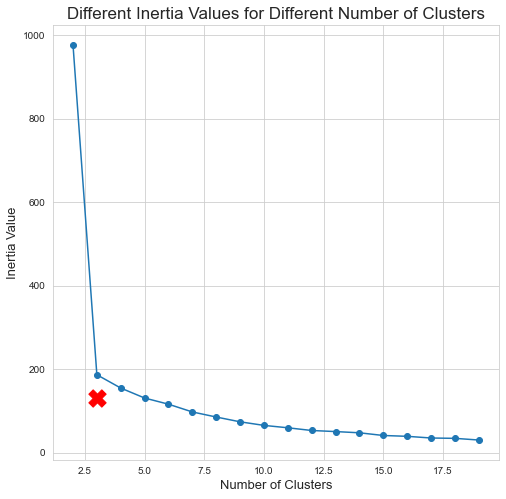

In [17]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

inertia_list = []
for num_clusters in range(2, 20):
    kmeans_model = KMeans(n_clusters=num_clusters, init="k-means++")
    kmeans_model.fit(X)
    inertia_list.append(kmeans_model.inertia_)
    
    print(        "For n_clusters =", num_clusters,"The inertia is :", kmeans_model.inertia_)
    
# plot the inertia curve
plt.plot(range(2,20),inertia_list)
plt.scatter(range(2,20),inertia_list)
plt.scatter(3, inertia_list[3], marker="X", s=300, c="r")
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Inertia Value", size=13)
plt.title("Different Inertia Values for Different Number of Clusters", size=17)

OTRO EJEMPLO DE SELECCION DEL NUMERO OPTIMO DE CLUSTERS K USANDO EL METODO DEL CODO (ELBOW METHOD) Y LA INTERTIA_

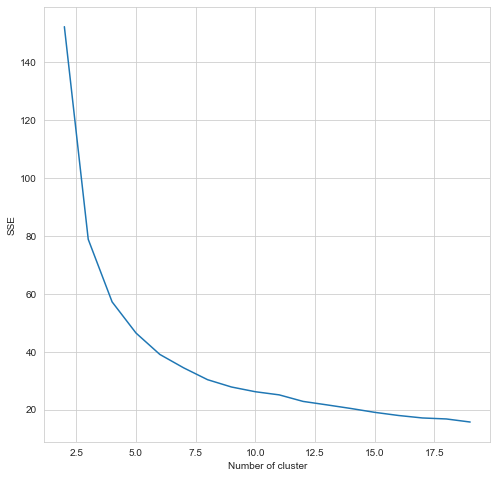

In [18]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import davies_bouldin_score

iris = load_iris()

X = pd.DataFrame(iris.data, columns=iris['feature_names'])
#print(X)
#data = X[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']]
data=X

sse = {}
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k,init='k-means++').fit(data)
    
    cluster_labels = kmeans.labels_
    #data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    
    
    
    #silhouette_avg = silhouette_score(data, cluster_labels)
    #print(        "For n_clusters =", k,"The average silhouette_score is :", silhouette_avg)
    
    #davies = davies_bouldin_score(data, cluster_labels)
    #print(        "For n_clusters =", k,"The average davies_boulder is is :", davies)
    
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [33]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### OTRAS METRICAS PARA MEDIR CLUSTERS

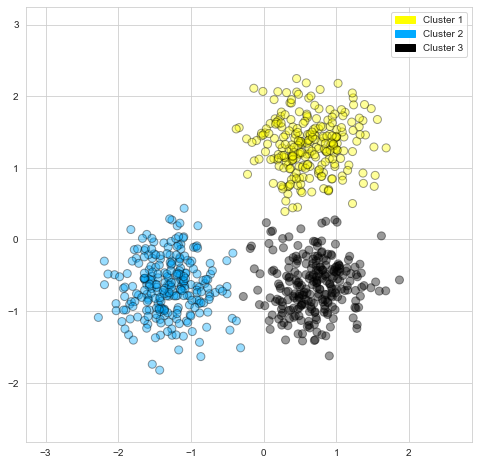

In [15]:
from sklearn import datasets
from adspy_shared_utilities import plot_labelled_scatter
iris = datasets.load_iris()
#X = iris.data
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler

# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

# #############################################################################



kmeans = KMeans(n_clusters=3, random_state=1).fit(X)

cls_assignment = kmeans.fit_predict(X)
plot_labelled_scatter(X, cls_assignment,         ['Cluster 1', 'Cluster 2', 'Cluster 3'])

#cls_assignment



In [10]:
labels = kmeans.labels_
print(kmeans.cluster_centers_)
print(kmeans.inertia_)
print(davies_bouldin_score(X, labels))
print(silhouette_score(X, labels))

[[ 0.62260555  1.3172598 ]
 [-1.30266211 -0.65704205]
 [ 0.6954587  -0.64442334]]
212.3913224947271
0.47620136185481915
0.6496075455022047


For n_clusters = 2 The average silhouette_score is : 0.681046169211746
For n_clusters = 3 The average silhouette_score is : 0.552819012356409
For n_clusters = 4 The average silhouette_score is : 0.4980505049972864
For n_clusters = 5 The average silhouette_score is : 0.4912399796764465
For n_clusters = 6 The average silhouette_score is : 0.3648340039670014
For n_clusters = 7 The average silhouette_score is : 0.3475042328046151
For n_clusters = 8 The average silhouette_score is : 0.3617900335973798
For n_clusters = 9 The average silhouette_score is : 0.3289671731553873


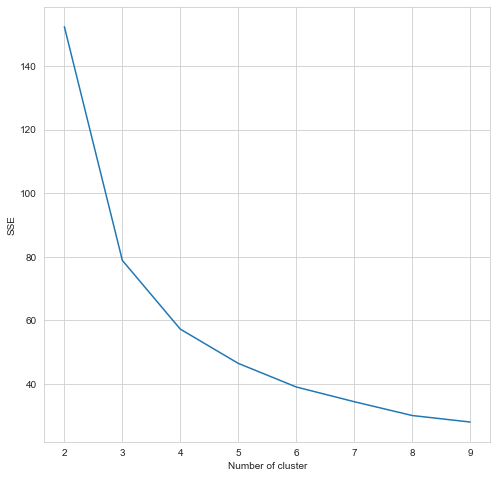

In [21]:
sse = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k,init='k-means++').fit(X)
    
    cluster_labels = kmeans.labels_
    
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    
    
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(        "For n_clusters =", k,"The average silhouette_score is :", silhouette_avg)
    
   
    
    #davies = davies_bouldin_score(X, cluster_labels)
    #print(        "For n_clusters =", k,"The average davies_boulder is is :", davies)
    
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

SE PUEDE ACCEDER AL VALOR INDIVIDUAL DE SILHOUETTE PARA CADA PUNTO....

In [19]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
   
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(        "For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    print(sample_silhouette_values)

    

For n_clusters = 2 The average silhouette_score is : 0.7049787496083261
[0.62643517 0.74016134 0.65249208 0.86394454 0.66165245 0.80696245
 0.45547913 0.28653776 0.71810163 0.58907942 0.61377265 0.71892965
 0.45565899 0.86094763 0.66691923 0.74191164 0.69203596 0.70857758
 0.87969871 0.49201356 0.68235011 0.6439099  0.60939025 0.82816278
 0.6226395  0.70179374 0.89639594 0.85495452 0.63515552 0.63950586
 0.72624688 0.87052001 0.58309319 0.7031889  0.4958427  0.6440799
 0.71486796 0.60542121 0.65920322 0.7360256  0.58984064 0.66234893
 0.80562204 0.19410325 0.66186726 0.68571044 0.61545205 0.65231957
 0.88854839 0.81266062 0.8592512  0.70375064 0.73728751 0.54704894
 0.73777943 0.71091344 0.71780772 0.6407557  0.73875877 0.63205923
 0.87589125 0.84066606 0.71205188 0.69968163 0.88185095 0.63625353
 0.71777612 0.54965788 0.67223323 0.7452715  0.72233152 0.65599852
 0.38809585 0.66793515 0.58128132 0.65764886 0.7083483  0.66102934
 0.49245687 0.74293121 0.86119506 0.88586213 0.70700452 0.

For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
[ 0.62903385  0.43289576  0.55834047  0.82660742  0.35213124  0.74123252
  0.68902347  0.58705868  0.04062548  0.73241492  0.59363669  0.75135825
  0.66326503  0.81480193  0.45066007  0.59477448  0.10348453  0.66633309
  0.84176332  0.6089521   0.70366952  0.66565716  0.59626118  0.78488729
  0.64257685  0.53469157  0.86623858  0.80913231  0.62625573  0.70079616
  0.62490578  0.83417556  0.74035924  0.54405603  0.71658615  0.6694404
  0.69313134  0.60546734  0.58315885  0.59179481  0.64472091  0.56153618
  0.73581549  0.50944136  0.66243564  0.73163465  0.57031198  0.68128648
  0.85802959  0.76946886  0.81915048  0.68541025  0.5406262   0.72334031
  0.63576372  0.69892782  0.64245745  0.40251287  0.57213237  0.46118988
  0.83726051  0.80179027  0.45393636  0.54665199  0.85023055  0.6688164
  0.69778864  0.69091353  0.68586222  0.46727706  0.64892594  0.6808235
  0.66206932  0.69871837  0.71865188  0.68494268  0.753

For n_clusters = 6 The average silhouette_score is : 0.4504666294372765
[ 0.34677463  0.49207782  0.56874701  0.50417507  0.35586634  0.47142912
  0.69497001  0.59361364  0.04170062  0.73774366  0.48268728  0.01941005
  0.67057392  0.32948516  0.45520941  0.44984459  0.10407067  0.2520883
  0.04726982  0.59817005  0.71283934  0.67535737  0.57265368  0.47563371
  0.64907014  0.49456419  0.02614123  0.51161418  0.63697831  0.70638764
  0.22006843  0.48572026  0.74673339  0.03780326  0.72308421  0.51782812
  0.69122689  0.61408609  0.41806934  0.5736876   0.65173057  0.57170711
  0.39416168  0.51539606  0.64210979  0.52742176  0.5810399   0.66828309
  0.27584714  0.22136239  0.4419      0.64921721  0.54264388  0.72893369
  0.40841947  0.70586969  0.56644356  0.31539623  0.53502168  0.46642802
  0.16218669  0.14614583  0.45950871  0.54091102  0.31065351  0.67488435
  0.30193847  0.69828496  0.68261503  0.39372462  0.13480852  0.69025985
  0.66878663  0.3483176   0.71509356  0.6892646   0.0

  0.48339404  0.67957627]
For n_clusters = 8 The average silhouette_score is : 0.3314853899648912
[ 0.31136977  0.5092198   0.53528881  0.48042125  0.26975696  0.48998637
  0.46171954  0.45940215  0.33006837  0.26191795  0.46767561  0.10638216
  0.5205051   0.46268439  0.30966477  0.46132463  0.26008812  0.32365804
  0.31363024  0.22815568  0.17769652  0.33460586  0.08540879  0.50799333
 -0.02904806  0.4653019   0.16037227  0.51864959  0.53660572  0.07474788
  0.23087354  0.42787639  0.37576699  0.0528685   0.51340231  0.49250274
  0.35091993  0.20824579  0.41491137  0.40846479  0.21947699  0.51371095
  0.46517425  0.39075906  0.31317149  0.49668772  0.55052034  0.24897456
  0.2769196   0.31788786  0.39497093  0.42656738  0.33710007  0.38186278
  0.42740091  0.27845455  0.49946102  0.2825252   0.42484346  0.12830982
  0.13952226  0.25673363  0.11715319  0.47084337  0.34672769  0.06521331
  0.37626712  0.4391686   0.12186739  0.38021227  0.15165754  0.25953982
  0.518183    0.295589    

For n_clusters = 10 The average silhouette_score is : 0.3392920964838248
[ 0.30536628  0.50868749  0.51499611  0.39241499  0.23323397  0.51133768
  0.34935655  0.4743605   0.12821806  0.12642173  0.46382497  0.12263872
  0.52595124  0.43504878  0.2958865   0.46400412  0.01487114  0.33450675
  0.02777604  0.02169595  0.24227978  0.25272864  0.31840957  0.27483418
  0.09817245  0.51079872  0.26832593  0.44042436  0.60320943  0.33394666
  0.23747818  0.40887519  0.0661713   0.04733321  0.40208073  0.48768417
  0.1726408   0.03797851  0.41086923  0.55698466  0.1428895   0.46741424
  0.52110122  0.4144851   0.4906375   0.49041968  0.60322106  0.46903065
  0.359529    0.33648614  0.11122214  0.39143873  0.5600178   0.10754823
  0.43240022  0.14832084  0.12670123  0.42312925  0.56095205  0.11802854
  0.25075844  0.47157928  0.28478534  0.51519703  0.37511916  0.2421689
  0.38791167  0.38154751  0.39038787  0.56743193  0.16005092  0.15466745
  0.50014746  0.28702084  0.13161966  0.46514918  0.

### Agglomerative clustering

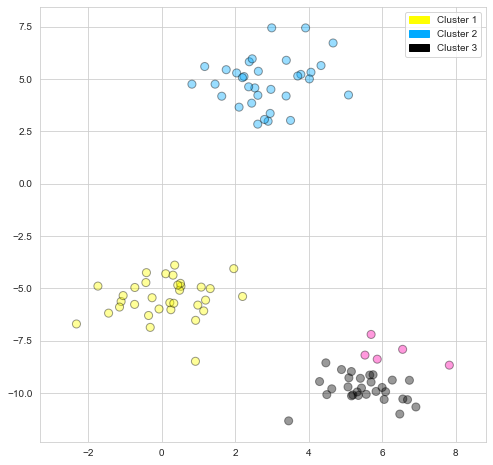

In [42]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from adspy_shared_utilities import plot_labelled_scatter

X, y = make_blobs(random_state = 10) #100 por defectos n_samples

#efecto linkaege

cls = AgglomerativeClustering(n_clusters = 4, linkage='complete')
cls_assignment = cls.fit_predict(X)

plot_labelled_scatter(X, cls_assignment, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3'])

In [43]:
cls.cluster_centers_ #hacer con labels_

AttributeError: 'AgglomerativeClustering' object has no attribute 'cluster_centers_'

In [44]:
cls_assignment

array([0, 0, 1, 2, 1, 1, 2, 0, 1, 3, 2, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0,
       1, 0, 3, 1, 1, 1, 1, 2, 0, 1, 1, 2, 0, 0, 0, 1, 1, 1, 0, 3, 0, 0,
       1, 2, 2, 2, 0, 2, 1, 0, 2, 3, 0, 3, 1, 0, 2, 2, 1, 1, 0, 0, 0, 2,
       2, 0, 0, 0, 1, 2, 1, 1, 0, 1, 1, 0, 2, 2, 2, 1, 2, 1, 0, 1, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 0, 1, 2, 2, 2], dtype=int64)

In [45]:
cls.predict([[1,1]])

AttributeError: 'AgglomerativeClustering' object has no attribute 'predict'

In [46]:
cls.intertia_ # las otras metricas si se pueden calcular

AttributeError: 'AgglomerativeClustering' object has no attribute 'intertia_'

In [47]:
cls.labels_

array([0, 0, 1, 2, 1, 1, 2, 0, 1, 3, 2, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0,
       1, 0, 3, 1, 1, 1, 1, 2, 0, 1, 1, 2, 0, 0, 0, 1, 1, 1, 0, 3, 0, 0,
       1, 2, 2, 2, 0, 2, 1, 0, 2, 3, 0, 3, 1, 0, 2, 2, 1, 1, 0, 0, 0, 2,
       2, 0, 0, 0, 1, 2, 1, 1, 0, 1, 1, 0, 2, 2, 2, 1, 2, 1, 0, 1, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 0, 1, 2, 2, 2], dtype=int64)

In [49]:
from sklearn.metrics import davies_bouldin_score, silhouette_score

sse = {}
for k in range(2, 10):
    cls = AgglomerativeClustering(n_clusters = k, linkage='complete')
    cls_assignment = cls.fit_predict(X)
    
   
     
    
    
    silhouette_avg = silhouette_score(X, cls_assignment)
    print(        "For n_clusters =", k,"The average silhouette_score is :", silhouette_avg)
    
   
    
    #davies = davies_bouldin_score(X, cls_assignment)
    #print(        "For n_clusters =", k,"The average davies_boulder is is :", davies)

For n_clusters = 2 The average silhouette_score is : 0.7139217165170764
For n_clusters = 3 The average silhouette_score is : 0.7823749853353591
For n_clusters = 4 The average silhouette_score is : 0.654460004905299
For n_clusters = 5 The average silhouette_score is : 0.5036096433465832
For n_clusters = 6 The average silhouette_score is : 0.37501832192879553
For n_clusters = 7 The average silhouette_score is : 0.38298667400120867
For n_clusters = 8 The average silhouette_score is : 0.33813896971973684
For n_clusters = 9 The average silhouette_score is : 0.3133026778438376


#### Creating a dendrogram (using scipy) SIRVE TAMBIEN PARA DECIDIR EL NUMERO DE CLUSTERS DE AGLOMERATIVO

This dendrogram plot is based on the dataset created in the previous step with make_blobs, but for clarity, only 10 samples have been selected for this example, as plotted here:

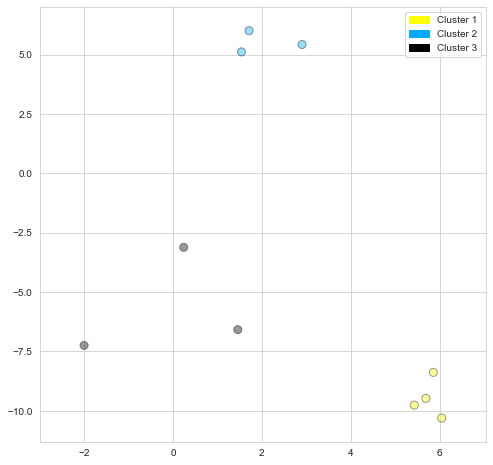

[[  5.69192445  -9.47641249]
 [  1.70789903   6.00435173]
 [  0.23621041  -3.11909976]
 [  2.90159483   5.42121526]
 [  5.85943906  -8.38192364]
 [  6.04774884 -10.30504657]
 [ -2.00758803  -7.24743939]
 [  1.45467725  -6.58387198]
 [  1.53636249   5.11121453]
 [  5.4307043   -9.75956122]]


In [50]:
X1, y1 = make_blobs(random_state = 10, n_samples = 10)
plot_labelled_scatter(X1, y1, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3'])
print(X1)

And here's the dendrogram corresponding to agglomerative clustering of the 10 points above using Ward's method.  The index 0..9 of the points corresponds to the index of the points in the X array above.  For example, point 0 (5.69, -9.47) and point 9 (5.43, -9.76) are the closest two points and are clustered first.

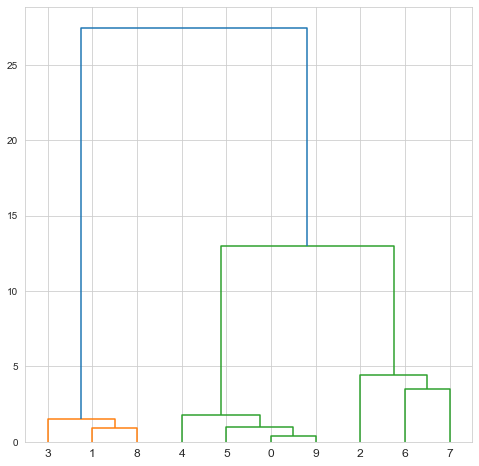

In [51]:
from scipy.cluster.hierarchy import ward, dendrogram
plt.figure()
dendrogram(ward(X1))
plt.show()

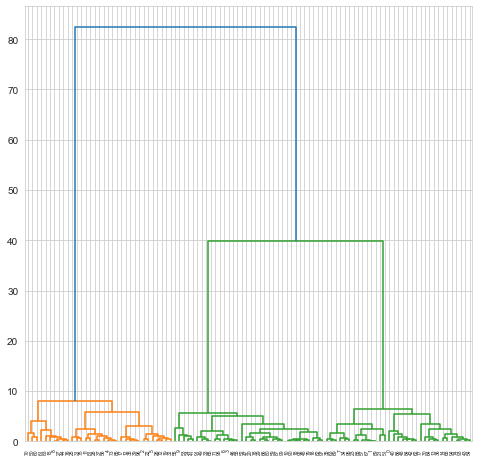

In [28]:
from scipy.cluster.hierarchy import ward, dendrogram
plt.figure()
dendrogram(ward(X))
plt.show()

# LA COSA ES MAS COMPLEJA Y COSTOSA CON MUCHOES ELEMENTOS

### DBSCAN clustering

Cluster membership values:
[0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1
 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0
 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0
 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0
 0 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0
 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


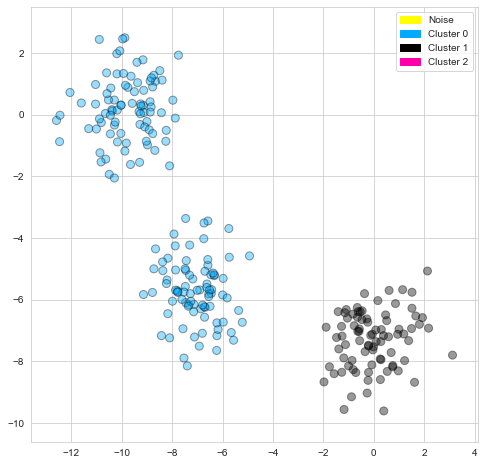

In [63]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state = 9, n_samples = 250)

dbscan = DBSCAN(eps = 2, min_samples = 2)

# mas eps desaparecen los outliers ....
#poner 250 samples ... y min_samles 4 al ser dimension 2 y eps el aproximado ....
#no hacen falta clusters

cls = dbscan.fit_predict(X)
print("Cluster membership values:\n{}".format(cls))

plot_labelled_scatter(X, cls + 1, 
        ['Noise', 'Cluster 0', 'Cluster 1', 'Cluster 2'])

### CALCULO DE EPS OPTIMO

In [107]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

neighbors = NearestNeighbors(n_neighbors=4) # n_neighbors es elvalor de min_samples que es 2*Dimension
#neighbors_fit = neighbors.fit(X)
distances, indices = neighbors.fit(X).kneighbors(X)





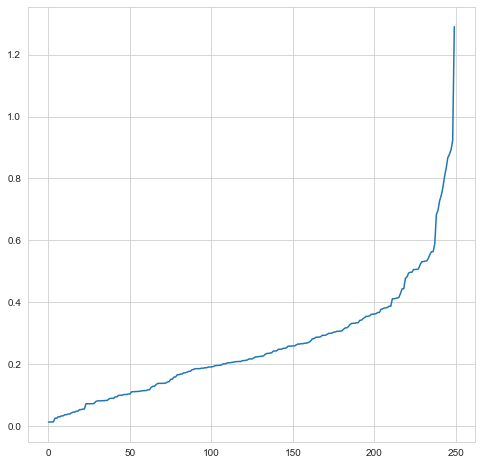

In [108]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [106]:
distances

array([0.01357577, 0.01357577, 0.01396345, 0.01396345, 0.02584066,
       0.02584066, 0.0305448 , 0.0305448 , 0.03355785, 0.03355785,
       0.03721492, 0.03721492, 0.03934312, 0.03934312, 0.04284137,
       0.04551741, 0.04551741, 0.04849768, 0.04849768, 0.05361003,
       0.05361003, 0.05526933, 0.05526933, 0.07243109, 0.07244514,
       0.07244514, 0.07278583, 0.07278583, 0.07363064, 0.07956792,
       0.08190847, 0.08190847, 0.08206768, 0.08252862, 0.08252862,
       0.08330012, 0.08330012, 0.08764201, 0.09011635, 0.09015508,
       0.09015508, 0.09510669, 0.09510669, 0.09972279, 0.09972279,
       0.10004306, 0.10184924, 0.10253526, 0.10253526, 0.10396173,
       0.10396173, 0.11133007, 0.11133007, 0.11198339, 0.11198339,
       0.11258424, 0.11258424, 0.11451428, 0.11451428, 0.11524674,
       0.11524674, 0.1178106 , 0.1178106 , 0.12538733, 0.12890935,
       0.12890935, 0.13436242, 0.13830886, 0.13830886, 0.13834613,
       0.13857131, 0.13857131, 0.13962529, 0.14282955, 0.14387

## GAUSSIAN MIXTURE MODEL

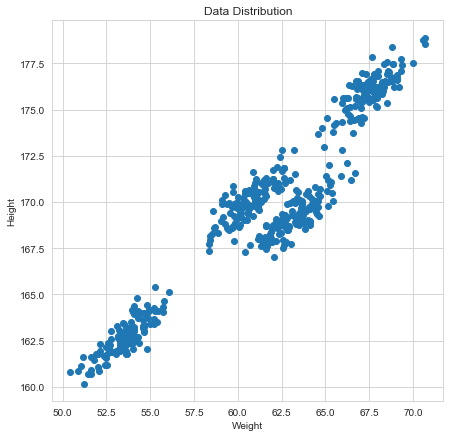

In [117]:
import pandas as pd
data = pd.read_csv('Clustering_gmm.csv')

plt.figure(figsize=(7,7))
plt.scatter(data["Weight"],data["Height"])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Data Distribution')
plt.show()

0.563772740763243
0.6264837800918939


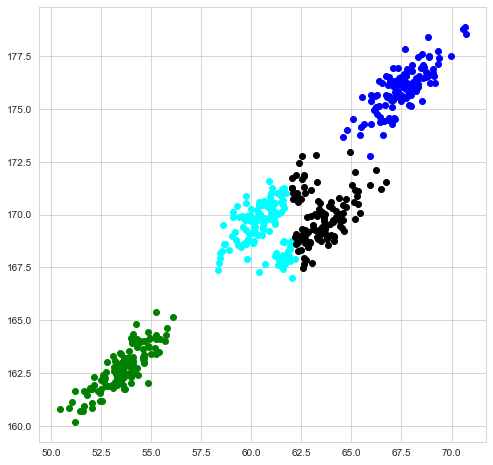

In [118]:
#training k-means model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

#predictions from kmeans
pred = kmeans.predict(data)



frame = pd.DataFrame(data)
frame['cluster'] = pred


print(davies_bouldin_score(data, pred))
print(silhouette_score(data, pred))
frame.columns = ['Weight', 'Height', 'cluster']


#plotting results
color=['blue','green','cyan', 'black']
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Weight"],data["Height"],c=color[k])
plt.show()

[[9.99999976e-01 1.14682842e-38 1.27149288e-13 2.35950785e-08]
 [1.00000000e+00 4.26530665e-51 4.92992862e-21 1.61703335e-13]
 [2.97466764e-08 1.14934922e-12 2.76372906e-06 9.99997207e-01]
 ...
 [2.80785887e-39 1.00000000e+00 2.24876670e-13 1.78434898e-13]
 [1.94793713e-50 1.00000000e+00 3.93178502e-22 8.36652898e-18]
 [6.38224922e-10 8.71270150e-11 1.73422042e-06 9.99998265e-01]]
0.6324681369972747
0.6009974999855136


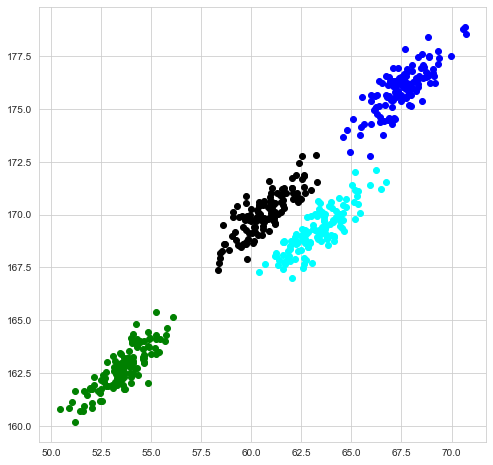

In [119]:
# training gaussian mixture model 

import pandas as pd
data = pd.read_csv('Clustering_gmm.csv')
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)
gmm.fit(data)

#predictions from gmm
labels = gmm.predict(data)

proba=gmm.predict_proba(data)
print(proba)

print(davies_bouldin_score(data, labels))
print(silhouette_score(data, labels))

frame = pd.DataFrame(data)
frame['cluster'] = labels
frame.columns = ['Weight', 'Height', 'cluster']

color=['blue','green','cyan', 'black']
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Weight"],data["Height"],c=color[k])
plt.show()

## Metricas de medicion de la "compacidad"-compactness

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


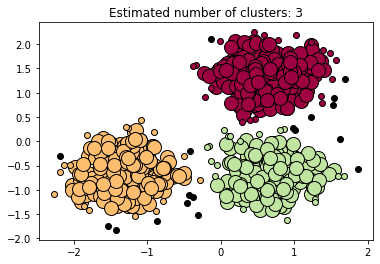

In [1]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()